# shift + m to merge

In [1]:
from mpl_toolkits.mplot3d import Axes3D #import 3d diagram
from matplotlib import cm #Colormap import
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import matplotlib.pyplot as plt 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [2]:
# expect something like this (e.g.): plot_dataframe_with_args([source_data_x,source_data_y,color],[result_data_x, result_data_y, color]) 
def plot_dataframe_with_args(*args):#(x_source, y_source, color_source, x_results, y_results, color_results, add_offset = False):
#     for i in args:
#         if i != args[0]:
    #plt.figure(figsize=(60, 25))
    plt.title('Uebung 2')
    plt.xlabel('Uebung2 - x')
    plt.ylabel('Uebung2 - y')
    for i in args:
        plt.plot(i[0],i[1]) 
    plt.show()

# 1) Erstellen Sie eine Pythonfunktion die, die
# logistische Funktion berechnet.
# Stellen Sie diese im Bereich [-5, 5] graphisch dar.

# 2) Implementieren Sie die Hypothese als Python Funktion:
# logistic_hypothesis(theta)
# Die Pythonfunktion soll dabei eine Funktion zurückgeben:
# >> theta = np.array([1.1, 2.0, -.9]) 
# >> h = logistic_hypothesis(theta) 
# >> print h(X) 
# array([ -0.89896965, 0.71147926, ....

In [3]:
def hypothesis(theta):
    def tmp(x):
        return np.array(x.dot(theta))
    return tmp

def sigmoid(hypo):
    return 1/(1+np.exp(-hypo))

def logistic_hypothesis(theta): # aufruf: log_hypo(theta)(x)
    def tmp(x):
        return sigmoid(np.array(x.dot(theta))) # return ist somit die Wahrscheinlichkeit für Klasse 0 oder Klasse 1 (da sigmoid über alles)
    return tmp


# 3) Implementieren Sie den Cross-Entropy-Loss und 
# den Squared-Error-Loss als Python Funktion. 
# Die Pythonfunktion soll dabei eine Funktion zurückgeben:

# >> loss = cross_entropy_loss(h, X, y)
# >> print loss(theta)
# array([ 7.3, 9.5, ....
# Rückgabevektor hat m-Elemente (Anzahl der Datensätze)

# 4) Implementieren Sie die Kostenfunktion J als Python Funktion:
# cost_function(X, y, h, loss)
# zusätzlich zu X und y soll die Funktion die Hypothese h 
# und den Loss aufnehmen.
# 
# Die Pythonfunktion soll dabei eine Funktion zurückgeben, die
# den Parametervektor theta aufnimmt.
#

In [4]:
## cost function
## Params: hypothesis, x , y, hypo+x = y_prediction; y_label = original data


#ich verstehe nicht, dass man eine hypothese als parameter nehmen soll aber zusätzlich die costen funktion eine Funktion zurück liefern soll, die gerade die parameter theta0 und theta1 aufnhemen soll, obwohl diese doch schon mit der hypothese gekommen sind
def mse_loss(hypothesis, x, y): 
    return lambda theta : np.square(((hypothesis(theta))(x)) - y)

def entropy_loss(hypothesis, x, y): 
    return lambda theta : y*np.log(hypothesis(theta)(x))+(1-y)*np.log(1-(hypothesis(theta)(x)))


def cost_function(X,y,h,loss):
    return lambda theta : (-1/(2*len(y))* np.sum(loss(h,X,y)(theta)))
    

def regularizated_cost_function(X,y,h,loss,regularization_factor):
    return lambda theta : (-1/(2*len(y))* np.sum(loss(h,X,y)(theta)) + regularization_factor * np.sum(np.square(theta[1:]))) 
    

In [5]:
# Standartisierung = z-score-normalisation = über features_list = hier gefragt
# Normalisierung = Min-Max-Scaling = über data set
#Wan was? kommt auf data an...
#link: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling

#np.apply_over_axes

def scale_in_axis(x):
    if (np.std(x) != 0):
        return (x-np.mean(x)) / np.std(x)
    return x

def scale(x):
#     mean = np.mean(x,axis=1)
#     standart_distri = np.std(x,axis=1)
#     result = np.devide(x.substract(mean,axis=1), standart_distri)
    return np.apply_along_axis(scale_in_axis,0,x)

# 5) Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der Hypothese.
# 5a) Schreiben Sie eine Funktion die die Update Rules anwendet zur Berechnung der neuen theta-Werte:
# theta = compute_new_theta(x, y, theta, alpha, hypothesis)
# 5b) Wählen Sie Startwerte in der Umgebung des Miniums der Kostenfunktion für theta. 
# Wenden Sie iterativ die compute_new_theta Funktion an und finden Sie so ein Theta mit niedrigen Kosten.
# Kapseln Sie dies in eine Funktion:
# theta = gradient_descent(alpha, theta, nb_iterations, X, y)

# 6) Zeichen Sie die Entscheidungsebene in den Scatter-Plot der Daten
# Hinweis: Für diese gilt: 
## log_func(theta[0] + theta[1] * x1 + theta[2] * x2) = 0.5 oder
##  theta[0] + theta[1] * x1 + theta[2] * x2 = 0



# 7 + 8 +9 siehe unten

In [6]:
#5a UPDATE RULE
def compute_new_theta(hypothesis_para,x, y, theta, alpha):
    tmp_theta = theta - alpha * 1.0/len(y) * x.T.dot(hypothesis_para(theta)(x) - y)
    return tmp_theta

In [7]:
#5a UPDATE RULE
def compute_new_theta_with_regularisation(hypothesis_para,x, y, theta, alpha,regularization_factor):
    #main_calculation = 1.0/len(y) * x.T.dot(hypothesis_para(theta)(x) - y)
    #tmp_theta_0 = theta[0] - alpha * main_calculation[0]
    tmp_theta_other = theta * (1 - alpha * (regularization_factor/len(y))) - alpha * 1.0/len(y) * x.T.dot(hypothesis_para(theta)(x) - y)
    #theta_vector = np.append(tmp_theta_0, tmp_theta_other)
    return tmp_theta_other

In [8]:
#5b
def iterative_gradient_descent(hypothesis_para,epochs,theta,l_rate, x,y,regularization_term):
    costs_list = np.array([])
    costs = cost_function(x,y,hypothesis_para,entropy_loss)
    
    mark_10_percent = (epochs * 10) / 100
    mark_10_multiplier = 1
    
    for i in range(epochs):
        kosten = costs(theta)
        costs_list = np.append(costs_list,kosten)
        theta = compute_new_theta(hypothesis_para,x, y, theta, l_rate)
#        if i%(epochs/100) == 0:
#             new_hypothesis = linear_hypothesis(theta_0, theta_1)
#             regression_model_test_values = new_hypothesis(x)
        if i%mark_10_percent==0 and i is not 0:
            print("------------------------------------------  ", mark_10_multiplier*10,"% mark reached  ----------------------------------------------------------")
            print("costs: ", kosten)    
            mark_10_multiplier+=1
            
    return costs_list, theta



def iterative_gradient_descent_with_regularisation(hypothesis_para,epochs,theta,l_rate, x,y,regularization_term):
    costs_list = np.array([])
    costs = regularizated_cost_function(x,y,hypothesis_para,entropy_loss,regularization_term)
    
    mark_10_percent = (epochs * 10) / 100
    mark_10_multiplier = 1
    
    for i in range(epochs):
        kosten = costs(theta)
        costs_list = np.append(costs_list,kosten)
        theta = compute_new_theta_with_regularisation(hypothesis_para,x, y, theta, l_rate,regularization_term)
        if i%mark_10_percent==0 and i is not 0:
            print("------------------------------------------  ", mark_10_multiplier*10,"% mark reached  ----------------------------------------------------------")
            print("costs: ", kosten)    
            mark_10_multiplier+=1
    return costs_list, theta


        
# costs_list = iterative_gradient_descent(100, np.random.normal(0, 10), np.random.normal(0, 10), 0.0001)
# print(costs_list.shape)
# print("Kosten: \n", costs_list)

In [9]:
## Decision Boundary ist eine Eigenschaft unserer Hypothese UND HAT ERSTMAL NICHTS MIT UNSEREN PREDICTIONS ZU TUHEN!!!!!!!!
## SIE IST ABHÄNGIG VON UNSEREN TRAINIERTEN THETA-WERTEN;
## man sieht so welche Punkte NACH UNSEREM TRAINING (da wir unsere trainierten theta-Werte übergeben müssen), als Klasse 0 oder Klasse 1 klassifiziert werden
def plotDecisionBoundary(theta,X):
    plt.title('Decision Boundary\n')
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.scatter(X[:,1][y==0], X[:,2][y==0], c='b', marker='o', label="class 0")
    plt.scatter(X[:,1][y==1], X[:,2][y==1], c='r', marker='x', label="class 1")

    # linspace= np.linspace(2.0, 3.0, num=5) -> array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ])
    #amin= Return the minimum of an array or minimum along an axis.
    #amax= Return the maximum of an array or maximum along an axis.

    xx = np.linspace(np.amin(X[:,1]), np.amax(X[:,1]), X.size) # -> Punkte für Decision Boundary
    #yy= -(theta[0] + theta[1]*xx)/(1-theta[2]) # umsetellen von theta[0] + theta[1]x + theta[2]y = 0 nach y (es ist egal, ob man zu x oder y umstellt), warum am Ende ein minus kommt kA
    yy= -(theta[0] + theta[2]*xx)/(1-theta[1]) # umsetellen von theta[0] + theta[1]x + theta[2]y = 0 nach y, warum am Ende ein minus kommt kA

    plt.plot(xx, yy, color='g', linewidth=5, label='Decision Boundary')
    plt.legend()
    plt.show()

In [10]:
def calculate_classification_error(X,y,theta):
    predictions = logistic_hypothesis(theta)(X)
    # ist numpy slicing
    predictions[predictions <= 0.5] = 0
    predictions[predictions > 0.5] = 1
    wrong_classifications = 0
#     for counter, prediction in enumerate(predictions):
#         if(prediction != )
    for prediction, target in zip(predictions, y):
        if(prediction != target):
            wrong_classifications += 1
    classification_error = wrong_classifications / X.size
    accuracy = 1-classification_error
    return classification_error,accuracy

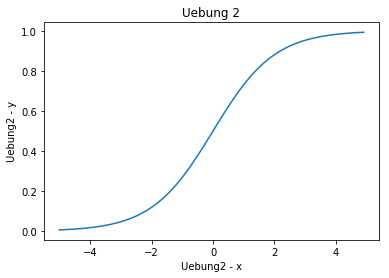

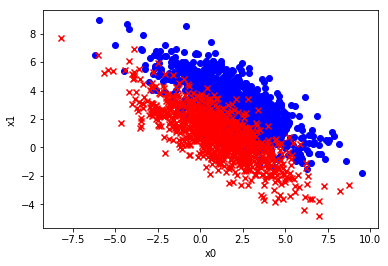

------------------------------------------   10 % mark reached  ----------------------------------------------------------
costs:  0.47839876266476444
------------------------------------------   20 % mark reached  ----------------------------------------------------------
costs:  0.3368272526901876
------------------------------------------   30 % mark reached  ----------------------------------------------------------
costs:  0.3096354937320385
------------------------------------------   40 % mark reached  ----------------------------------------------------------
costs:  0.2968076989591847
------------------------------------------   50 % mark reached  ----------------------------------------------------------
costs:  0.2856831242175239
------------------------------------------   60 % mark reached  ----------------------------------------------------------
costs:  0.2756615345670083
------------------------------------------   70 % mark reached  -----------------------------------

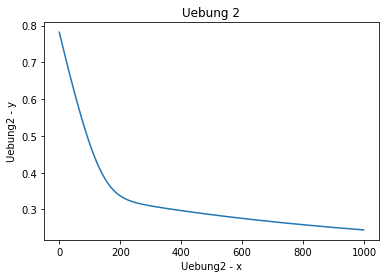

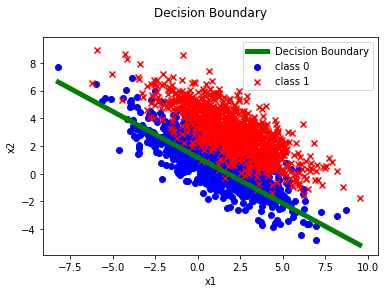

procent of wrong classified predictions (classification_error) 0.07133333333333333
Accuracy:  0.9286666666666666






 NOW WITH REGULARISATION






------------------------------------------   10 % mark reached  ----------------------------------------------------------
costs:  0.5978130979048826
------------------------------------------   20 % mark reached  ----------------------------------------------------------
costs:  0.36573196616587395
------------------------------------------   30 % mark reached  ----------------------------------------------------------
costs:  0.3271117285214563
------------------------------------------   40 % mark reached  ----------------------------------------------------------
costs:  0.31679739530046624
------------------------------------------   50 % mark reached  ----------------------------------------------------------
costs:  0.3110322023713828
------------------------------------------   60 % mark reached  ----------------------------------

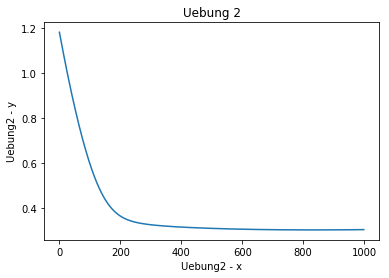

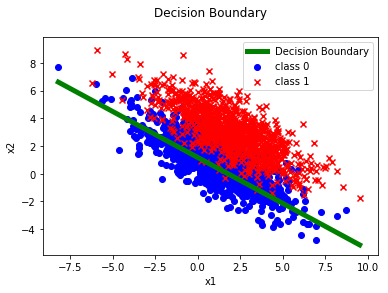

procent of wrong classified predictions (classification_error) 0.07133333333333333
Accuracy:  0.9286666666666666


In [11]:
if __name__ == "__main__":
    number_of_features = 2
    value_to_start_for_all_theta = 1
    epochs = 1000
    alpha = 0.01
    number_of_trainings_values = 1000
    regularization_factor = 0.2
    
    # class 0:
    # covariance matrix and mean
    show_values = np.arange(-5,5,0.1)
    show_y = sigmoid(show_values)
    plot_dataframe_with_args([show_values, show_y]) #show sigmoid
    
    cov0 = np.array([[5,-3],[-3,3]])

    mean0 = np.array([2.,3])

    # number of data points
    m0 = number_of_trainings_values
    # generate m0 gaussian distributed data points with
    # mean0 and cov0.
    r0 = np.random.multivariate_normal(mean0, cov0, m0)

    # covariance matrix
    cov1 = np.array([[5,-3],[-3,3]])
    mean1 = np.array([1.,1])
    m1 = number_of_trainings_values
    r1 = np.random.multivariate_normal(mean1, cov1, m1)


    
    plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="Klasse 0")
    plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="Klasse 1")
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.show()
    
    X = np.concatenate((r0,r1))
    X =  np.insert(X,0,1,axis=1) # ist richtig, damit theta später immer mit 1 multipliziert wird, und damit der konstante Faktor theta entsteht
    #print("r0: ", r0, "\n")
    #print("X: ", X)
    # y wird verändert, damit wir praktisch unsere targets haben, also 0 und 1
    y = np.zeros(len(r0)+len(r1)) # erst werden alle targets 0 gesetzt
    y[:len(r0),] = 1 #jetzt wird target vektor(keine Matrix, -> das Komma ist nur da, weil es dort sein muss) von 0 bis len(r0) 1 gesetzt, das heißt r0 ist unsere Klasse 1

    #############
    theta_vector = np.array([value_to_start_for_all_theta for i in range(number_of_features+1)])
    #print(len(theta_vector), "theta vector")
    #############
    
    #h = logistic_hypothesis(theta=theta_vector)
#     y_raw = h(x_ges) #without noise############################################################################# > unser "richtiges" y
#     y = np.array([((np.random.normal()*2)+ i) for i in y_raw])
#     print("shape x-Vector: ", x_ges.shape)
#     print("shape Theta-Vector: ",theta_vector.shape)
#     print("Shape hypothesis result: ", y.shape)
    
#     plt.figure(figsize=(60, 40))
#     ax = plt.axes(projection='3d')
#     ax.scatter(x_1[:], x_2[:], y_raw, c='r',s=750)
#     ax.scatter(x_1[:], x_2[:], y,c='b',s=750) #blue = with noise
    
#     plt.show() 
#     #scaled_x = scale(x_ges) 

    costs, theta = iterative_gradient_descent(logistic_hypothesis,epochs,theta_vector,alpha, X,y,regularization_factor)
    
    plot_dataframe_with_args([[i for i in range(len(costs))],costs]) # show costs
    plotDecisionBoundary(theta,X)                                    # show dicision boundary

    classification_error,accuracy = calculate_classification_error(X,y,theta)
    print("procent of wrong classified predictions (classification_error)", classification_error)
    print("Accuracy: ", accuracy)
    
    
    
    
    print("\n\n\n\n\n\n NOW WITH REGULARISATION\n\n\n\n\n\n")
    
    
    
    
    
    costs, theta = iterative_gradient_descent_with_regularisation(logistic_hypothesis,epochs,theta_vector,alpha, X,y,regularization_factor)
    
    plot_dataframe_with_args([[i for i in range(len(costs))],costs]) # show costs
    plotDecisionBoundary(theta,X)                                    # show dicision boundary

    classification_error,accuracy = calculate_classification_error(X,y,theta)
    print("procent of wrong classified predictions (classification_error)", classification_error)
    print("Accuracy: ", accuracy)